# Proyecto 10

## Descripción del proyecto

Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

**Objetivos:**

- Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.
- Crear un modelo para predecir el volumen de reservas en pozos nuevos.
- Elegir los pozos petrolíferos que tienen los valores estimados más altos.
- Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.
- Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

**Condiciones:**

- Solo se debe usar la regresión lineal para el entrenamiento del modelo.
- Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
- El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
- Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
- Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.
- Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.

**Descricpión de datos:**

Los datos de exploración geológica de las tres regiones se almacenan en archivos:

- geo_data_0.csv 
- geo_data_1.csv 
- geo_data_2.csv 

- id — identificador único de pozo de petróleo
- f0, f1, f2 — tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)
- product — volumen de reservas en el pozo de petróleo (miles de barriles).

## Preparación de datos

In [3]:
# Importación de librerías

import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Preprocesamiento
from sklearn.model_selection import train_test_split

# Modelo
from sklearn.linear_model import LinearRegression

# Métricas
from sklearn.metrics import mean_squared_error

# Omitir advertencias futuras
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Importación de datasets

# Región 0
region_0 = pd.read_csv('/datasets/geo_data_0.csv')

# Región 1
region_1 = pd.read_csv('/datasets/geo_data_1.csv')

# Región 2
region_2 = pd.read_csv('/datasets/geo_data_2.csv')

### Exploración de datos: región 0

In [5]:
# Función para exploración de datos

def explor(data):
    # Visualización de datos
    display(data)

    # Descripcion de datos
    print(data.info())

    print('\n')

    # Exploración de duplicados totales
    print('Duplicados totales:', data.duplicated().sum())

    # Duplicados en product
    print('Duplicados en columna product:', data['product'].duplicated().sum())

    return

In [6]:
# Región 0
explor(region_0)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


Duplicados totales: 0
Duplicados en columna product: 0


### Exploración de datos: región 1

In [7]:
# Región 1
explor(region_1)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


Duplicados totales: 0
Duplicados en columna product: 99988


### Exploración de datos: región 2

In [8]:
# Región 2
explor(region_2)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


Duplicados totales: 0
Duplicados en columna product: 0


<span style=color:blue>**Comentario**</span>

- No hay datos ausentes ni filas totalmente duplicadas en ninguno de los datasets. 
- Los datos de producción de la región 1 están casi totalmente duplicados, pero esto se puede deber a que son datos sintéticos. No hay necesidad de modificarlos. 
- Los datos están listos para el entrenamiento del modelo.

## Entrenamiento del modelo

- Se entrenará un modelo de regresión lineal.
- Se crearán sets de entrenamiento y validación en proporción 75:25.
- La columna id no será considerada como una característica para el entrenamiento del modelo. 
- Todos los pasos se incluirán dentro de una función para probar con cada dataset de cada región

In [9]:
# Se crea una función para la creación de los sets de entranamiento y validación
# y para el entrenamiento y predicciones del modelo

def oil_model(data):

    # Creación de sets de entrenamiento y validación 75:25
    train, valid = train_test_split(data, test_size=0.25, random_state=7523)

    # Creación de características para sets de entrenamiento y validación
    train_features = train.drop(['id', 'product'], axis=1)
    valid_features = valid.drop(['id', 'product'], axis=1)

    # Creación de objetivos para sets de entrenamiento y validación
    train_target = train['product']
    valid_target = valid['product']

    # Entrenamiento de modelo
    model = LinearRegression()

    model.fit(train_features, train_target)

    # Predicciones del modelo
    predicted_valid = model.predict(valid_features)

    predicted_valid = pd.Series(predicted_valid)  # Conversión a Series

    # Unión de las predicciones al conjunto de validación
    valid.reset_index(drop=True, inplace=True)  # Reseteo del índice
    valid['predicted'] = predicted_valid

    # Volumen medio de reserva predicho
    print('Volumen medio de reserva predicho:',
          predicted_valid.mean(), 'miles de barriles')

    # RMSE
    print('RMSE del modelo:', mean_squared_error(
        valid_target, predicted_valid)**0.5)

    return valid

## Prueba del modelo en cada región

In [10]:
# Predicción en región 0
predicted_r0 = oil_model(region_0)

predicted_r0

Volumen medio de reserva predicho: 92.5329983660657 miles de barriles
RMSE del modelo: 37.7502582166637


/tmp/ipykernel_328/3296840234.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predicted'] = predicted_valid


,id,f0,f1,f2,product,predicted
0,AD8v4,0.441967,0.860617,3.230275,133.160978,88.540261
1,nrZ6t,0.887282,0.218935,-0.496768,158.608710,74.709313
2,9Q25g,-0.965680,0.339794,4.159681,144.467416,96.542853
3,QJVYl,1.081133,0.226231,6.345830,132.168147,120.510807
4,i3ekw,0.809710,-0.564610,0.492799,48.113475,91.969643
...,...,...,...,...,...,...
24995,v9XXY,-0.990798,0.136410,0.597581,114.954625,75.803783
24996,yp58A,0.196555,-0.125365,3.323205,107.170716,102.082751
24997,Bx2dy,0.801548,0.484978,4.009034,66.985114,100.363149
24998,s8wDS,0.340588,-0.366831,7.270300,175.839209,132.086839


In [11]:
# Predicción en región 1
predicted_r1 = oil_model(region_1)

predicted_r1

Volumen medio de reserva predicho: 68.60240693309099 miles de barriles
RMSE del modelo: 0.886662778052821


/tmp/ipykernel_328/3296840234.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predicted'] = predicted_valid


,id,f0,f1,f2,product,predicted
0,uFmdD,17.451730,1.169742,3.004342,80.859783,80.069448
1,QQx0G,2.668819,-7.676667,0.002069,0.000000,1.484859
2,2dBLV,6.397868,-5.947768,3.995454,107.813044,108.538423
3,OXRnE,-3.202532,-4.846561,2.999107,84.038886,83.054283
4,gH65b,8.033331,-1.946525,4.996578,134.766305,135.198548
...,...,...,...,...,...,...
24995,uHW7a,-2.104012,-6.678341,2.998816,84.038886,82.926064
24996,uYSId,12.104167,-10.577179,0.005957,0.000000,0.282086
24997,wPVaI,5.582582,-4.931579,4.994188,134.766305,135.553473
24998,SjV5r,-8.993127,-1.448482,-0.005114,3.179103,2.851035


In [12]:
# Predicción en región 2
predicted_r2 = oil_model(region_2)

predicted_r2

Volumen medio de reserva predicho: 94.98902973033655 miles de barriles
RMSE del modelo: 40.01807637953782


/tmp/ipykernel_328/3296840234.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predicted'] = predicted_valid


,id,f0,f1,f2,product,predicted
0,yC57A,2.120790,1.478765,1.997981,129.750630,92.009281
1,NicFE,-1.284138,1.212803,1.120910,100.924334,86.951250
2,6RVCC,2.912084,2.080017,4.941228,175.747487,108.932552
3,bvzHX,-0.359538,3.957401,6.620198,116.812567,118.476832
4,1Ko1Z,1.061781,-0.544080,3.064629,159.478407,98.259843
...,...,...,...,...,...,...
24995,cXjXr,-1.258131,-2.764622,2.664362,78.283277,96.064676
24996,uG1fG,-2.110648,0.499163,6.157952,127.054073,115.997804
24997,AFPd4,-0.165162,-2.224614,0.446706,35.479544,83.268241
24998,CN29K,-3.469810,-0.925302,0.818412,80.498243,85.315411


<span style=color:blue>**Comentario**</span>

- La producción promedio estimada más alta se obtuvo en la región 2, con un volumen promedio predicho de 94.989 miles de barriles.
- El RMSE más bajo se obtuvo en la región 1, con un valor de 0.8866 miles de barriles, debido a la cantidad tan alta de valores duplicados.
- En la región 0 se obtuvo un volumen medio casi tan alto como el de la región 2, con un RMSE más bajo. 

## Cálculo de ganancias 

**Consideraciones:**

1. El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
2. Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
3. Dada la inversión de 100 millones por 200 pozos petrolíferos, de media un pozo petrolífero debe producir al menos un valor de 500,000 dólares en unidades para evitar pérdidas (esto es equivalente a 111.1 unidades). 
4. **Para el cálculo del beneficio, restaré del ingreso de los 200 pozos, la inversión estimada de $100,000,000 USD.**

### Selección de pozos y región

In [13]:
# Función para seleccionar los 200 pozos con mejores predicciones, calcular el volumen total
# de producción, y el beneficio bruto de los 200 pozos seleccionados

def profit_200(data, print_results = False):
    """
    La función toma como argumento el dataset de predicciones para cada región y devuelve
    el revenue como resultado. 

    En caso de seleccionar print_results como True (False por default), imprimirá dos enunciados para el volumen 
    producido y para el beneficio bruto generado. 

    """

    # Ordenar de forma descendente por valores predichos
    data.sort_values(by='predicted', ascending=False, inplace=True)

    data.reset_index(inplace=True, drop = True) # Reseteo de índice

    # Seleccionar los valores reales de las primeras 200 predicciones
    selected_200 = data.head(200)

    # Análisis de los 200 pozos seleccionados

    # Volumen de producción
    volume = selected_200['product'].sum()

    # Beneficio bruto  = volumen producido * ingreso - inversión
    profit = volume * 4500 - 100000000 

    # Imprimir el resultado
    if print_results==True:
        print(f'Volumen producido en la región: {volume:.0f} miles de barriles')
        print(f'Beneficio bruto de la región: ${profit:.2f} dólares')    

    return profit

In [14]:
# Beneficio bruto de los 200 pozos seleccionados en la región 0
profit_200(predicted_r0, print_results=True)

Volumen producido en la región: 29665 miles de barriles
Beneficio bruto de la región: $33493290.79 dólares


/tmp/ipykernel_328/3490443676.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(by='predicted', ascending=False, inplace=True)


33493290.78701909

In [15]:
# Beneficio bruto de los 200 pozos seleccionados en la región 1
profit_200(predicted_r1, print_results=True)

Volumen producido en la región: 27589 miles de barriles
Beneficio bruto de la región: $24150866.97 dólares


/tmp/ipykernel_328/3490443676.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(by='predicted', ascending=False, inplace=True)


24150866.966815114

In [16]:
# Beneficio bruto de los 200 pozos seleccionados en la región 2
profit_200(predicted_r2, print_results=True)

Volumen producido en la región: 27647 miles de barriles
Beneficio bruto de la región: $24411614.05 dólares


/tmp/ipykernel_328/3490443676.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(by='predicted', ascending=False, inplace=True)


24411614.05242254

<span style=color:blue>**Comentario**</span>

- La región 0 tiene el volumen de producción y beneficio bruto más alto de las 3 regiones, seguido de la región 2.
- **Se podría proponer a la región 0 como la candidata para el desarrollo de los 200 pozos.**

## Riesgos y ganancias por región (bootstrapping)

- Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
- Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.

In [17]:
# Función para hallar la distribución de los beneficios, su promedio y el intervalo de confianza usando
# la técnica de bootstrapping, también calcula el riesgo de pérdida de la región

def bootstrap_gains(data):
    """
    La función toma como entrada el dataframe de predicciones para cada región e imprime cuatro resultados:

    - el promedio del remuestreo
    - intervalo de confianza al 95%
    - el riesgo de pérdida en %
    - gráfico de la distribución del promedio de los beneficios

    """

    # Parámetros para bootstrapping
    n_bootstraps = 1000
    n = 500

    # Bootstrapping
    bootstrapped_gains = []
    for i in range(n_bootstraps):
        resample = data.sample(n=n, replace=True, random_state=i)
        revenue = profit_200(resample)
        bootstrapped_gains.append(revenue)

    bootstrapped_gains = np.array(bootstrapped_gains)

    # Promedio de ganancias remuestreadas
    bootstrapped_gains_mean = np.mean(bootstrapped_gains)

    print(
        f'Promedio de beneficios brutos por pozo petrolífero:\n {bootstrapped_gains_mean:.2f}')
    
    print('\n')

    # Intervalo de confianza al 95%

    lower = np.percentile(bootstrapped_gains, 2.5)
    upper = np.percentile(bootstrapped_gains, 97.5)

    print(f'Intervalo de confianza al 95%:\n [{lower:.2f}, {upper:.2f}]')

    print('\n')

    # Cálculo de riesgo

    risk = (bootstrapped_gains < 0).sum() * 100 / n_bootstraps
    print('Riesgo de pérdida de la región:', risk,'%')

    # Gráfico de la distribución de ganancias

    fig = plt.figure(figsize=(8, 4))
    sns.histplot(data=bootstrapped_gains, stat='density')
    plt.title('Distribución de beneficios por pozo petrolífero')
    plt.xlabel('Beneficios brutos (miles de dólares)')

    return 

Promedio de beneficios brutos por pozo petrolífero:
 3839764.89


Intervalo de confianza al 95%:
 [-1074895.12, 8849669.41]


Riesgo de pérdida de la región: 6.7 %


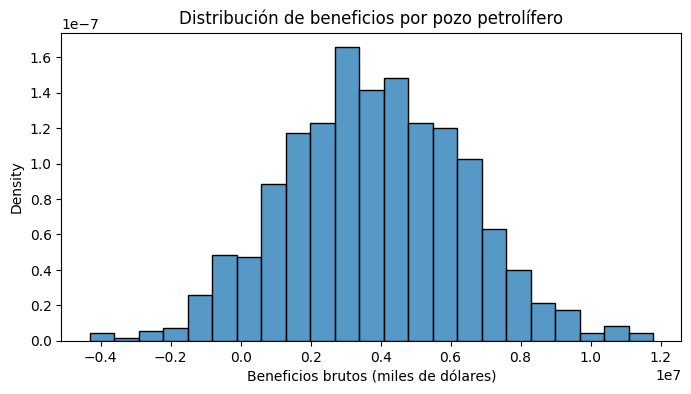

In [18]:
b0 = bootstrap_gains(predicted_r0)

Promedio de beneficios brutos por pozo petrolífero:
 4121516.79


Intervalo de confianza al 95%:
 [182596.66, 8187279.79]


Riesgo de pérdida de la región: 2.1 %


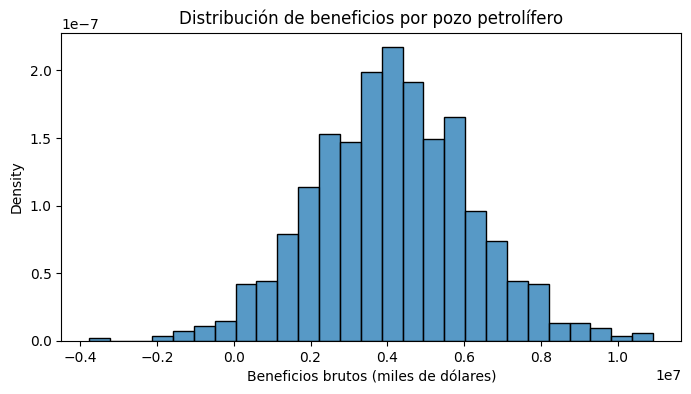

In [19]:
bootstrap_gains(predicted_r1)

Promedio de beneficios brutos por pozo petrolífero:
 3726538.78


Intervalo de confianza al 95%:
 [-1252108.09, 8992899.72]


Riesgo de pérdida de la región: 7.9 %


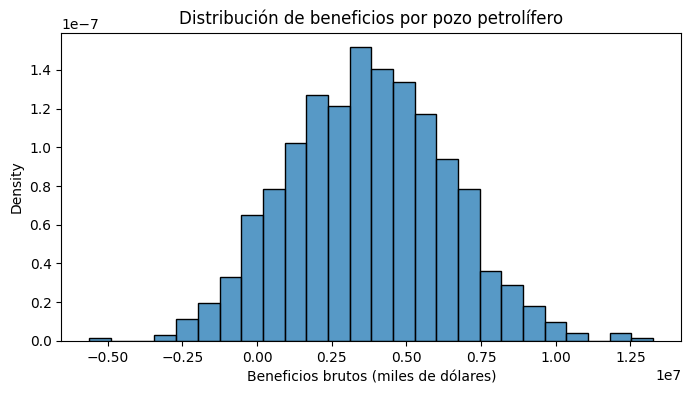

In [20]:
bootstrap_gains(predicted_r2)

<span style=color:blue>**Comentario**</span>

- El riesgo de pérdida más alto lo tiene la región 2 con 7.9%, seguido de la región 0 con 6.7%
- La región con el riesgo de pérdida más bajo fue la región 1, con 2.1%
- **La región 1 es la región apropiada para la inversión y desarrollo de los 200 pozos petrolíferos con beneficios dentro de un intervalo de confianza al 95% de [182596.66, 8187279.79]**

## Conclusiones del proyecto

1. A pesar de tener datos duplicados en el volumen de producción real de la región 1, estos valores no afectan al buen funcionamiento del bootstrap ni, por lo tanto, a la conclusión del proyecto. 
2. Durante el entrenamiento del modelo, la región 2 generó el volumen predicho más alto, sin embargo el beneficio bruto de esa región fue superado por la región 0.
3. Durante el cálculo de ganancias, parecía que la región 0 sería la más apropiada para el desarrollo de los 200 pozos, al generar el beneficio bruto más alto de las 3 regiones, pero al final no fue así.
4. Después de la técnica de bootstrapping, la región más apropiada para el desarrollo de los 200 pozos fue la región 1, con un riesgo de pérdida de 2.1% e ingresos en el intervalo de [182596.66, 8187279.79] dólares. 